In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image Processing

In [ ]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
path1 = '/content/drive/MyDrive/Captcha Dataset Kaggle/23n88.png'
path2 = '/content/drive/MyDrive/Captcha Dataset Kaggle/23mdg.png'

In [ ]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')

    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')

    plt.axis('off')

In [ ]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

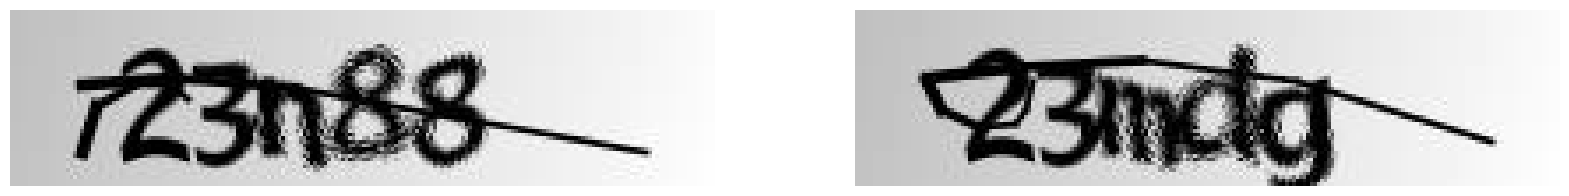

In [ ]:
plot_(img1, img2)

In [ ]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

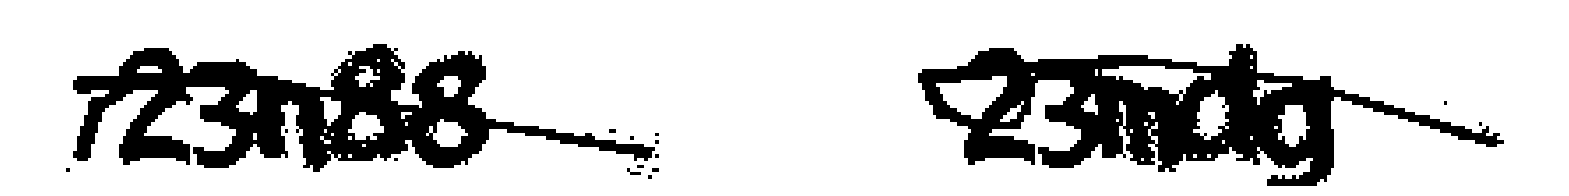

In [ ]:
plot_(thresh_img1, thresh_img2)

In [ ]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

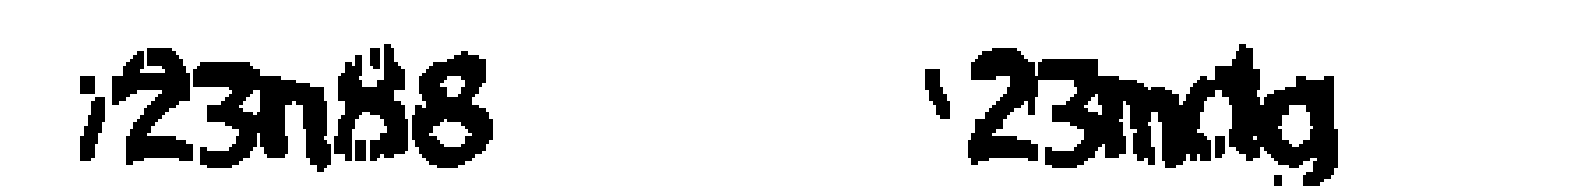

In [ ]:
plot_(close_img1, close_img2)

In [ ]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

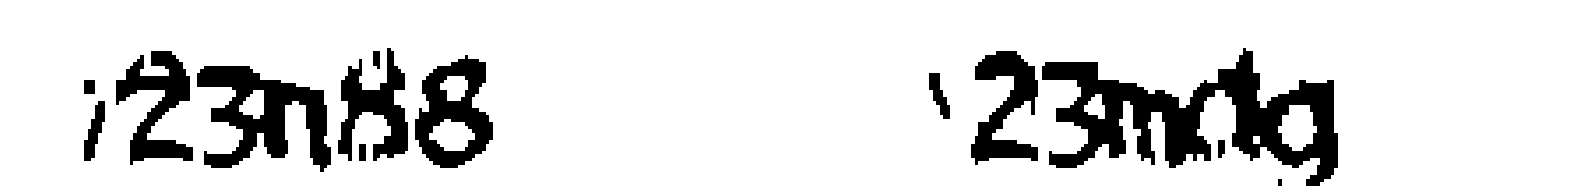

In [ ]:
plot_(dilate_img1, dilate_img2)

In [ ]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (3,3), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (3,3), 0)

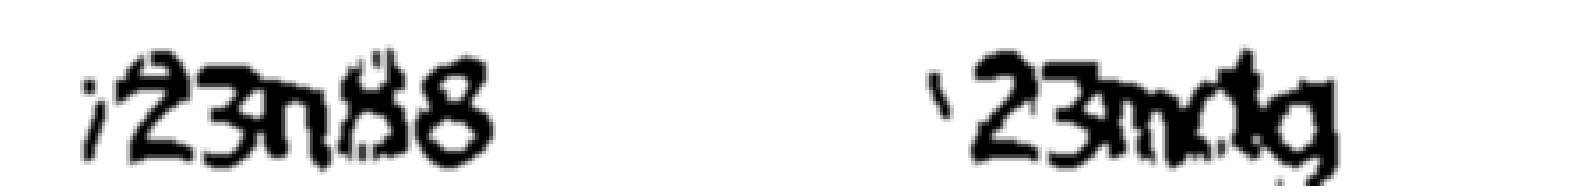

In [ ]:
plot_(gauss_img1, gauss_img2)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
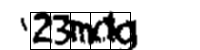

In [ ]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

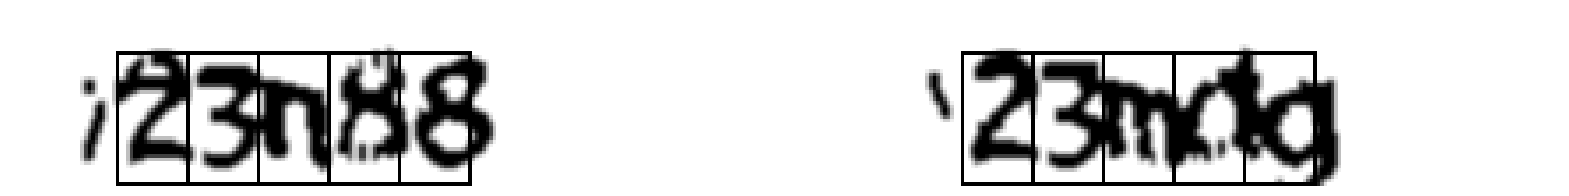

In [ ]:
plot_(gauss_img1, gauss_img2)


# Converting images to appropriate samples

In [ ]:
path = '/content/drive/MyDrive/Captcha Dataset Kaggle/'


In [ ]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (3,3), 0)

In [ ]:
import os
from PIL import Image
# from keras.preprocessing.image import img_to_array, ImageDataGenerator

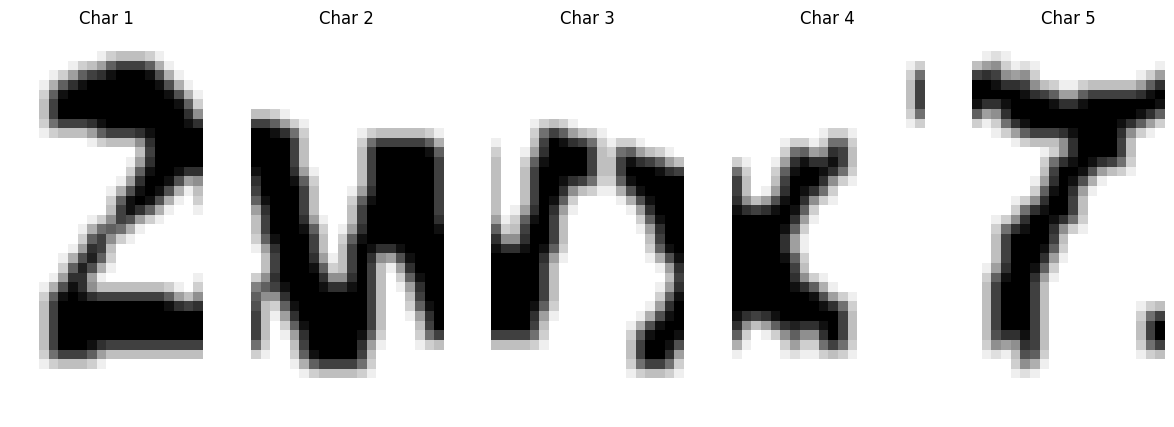

In [ ]:
X = []
y = []

for image in os.listdir(path) :

    if image[6:] != 'png' :
        continue

    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


# Initial Analysis and Data Wrangling¶


In [ ]:
X /= 255.0

[]

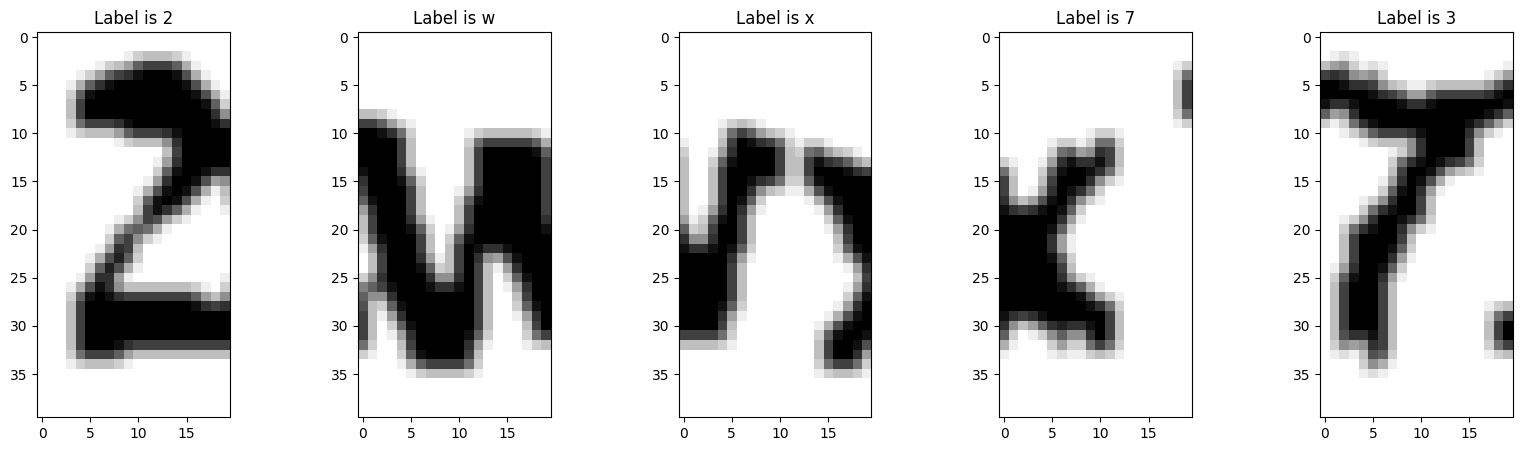

In [ ]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [ ]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of 5 : 281
Occurance count of m : 275
Occurance count of 2 : 265
Occurance count of d : 259
Occurance count of 7 : 258
Occurance count of n : 525
Occurance count of c : 262
Occurance count of x : 264
Occurance count of 3 : 267
Occurance count of 6 : 259
Occurance count of g : 271
Occurance count of f : 271
Occurance count of 8 : 264
Occurance count of b : 240
Occurance count of 4 : 284
Occurance count of p : 253
Occurance count of w : 235
Occurance count of e : 235
Occurance count of y : 232


In [ ]:
 temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

<ipython-input-26-c477dcff4fad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')


Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

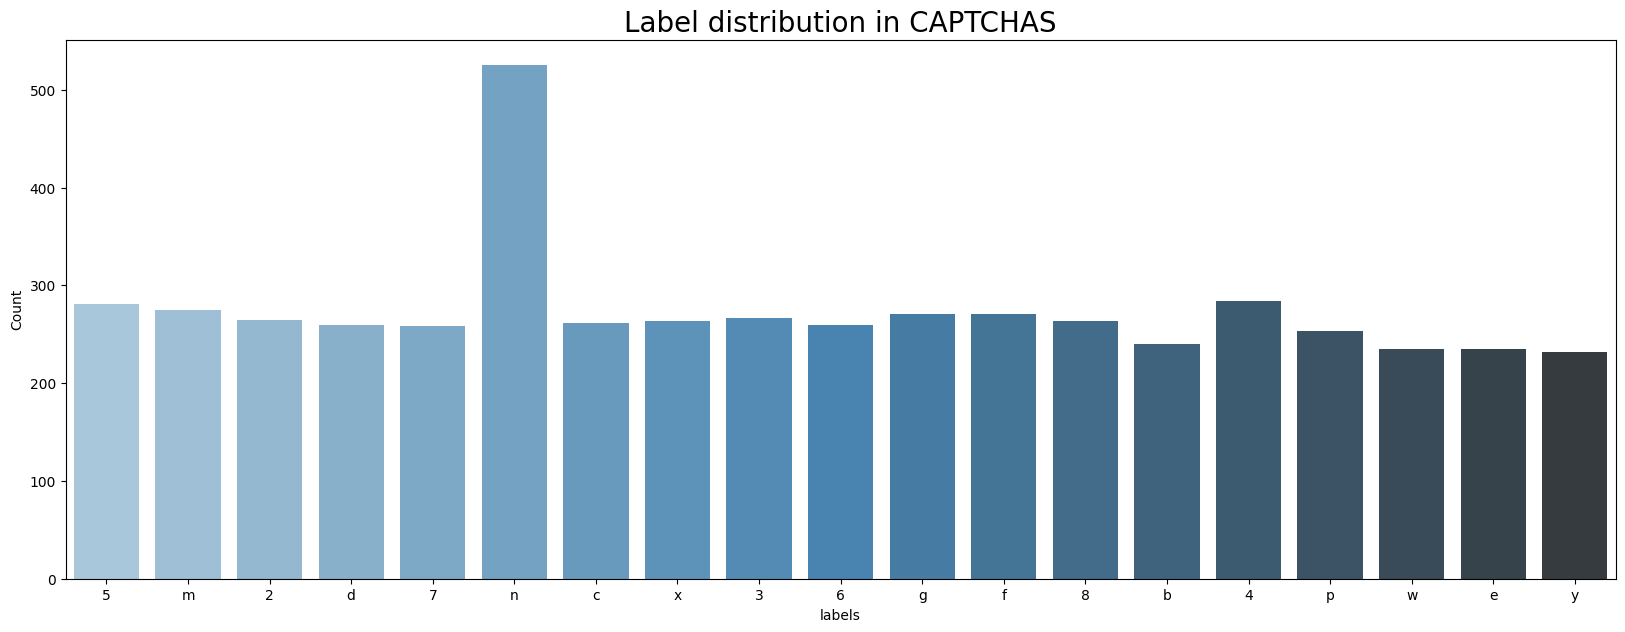

In [ ]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print('letter w : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter w : w
label : 16
Count : 235


In [ ]:
info = {y_combine[i] : y[i] for i in range(len(y))}

# Train Test Split

In [ ]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [ ]:
y_temp = np.argmax(y_test, axis = 1)

In [ ]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

<ipython-input-35-61f772194c12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')


Text(0.5, 1.0, 'Label distribution in test set')

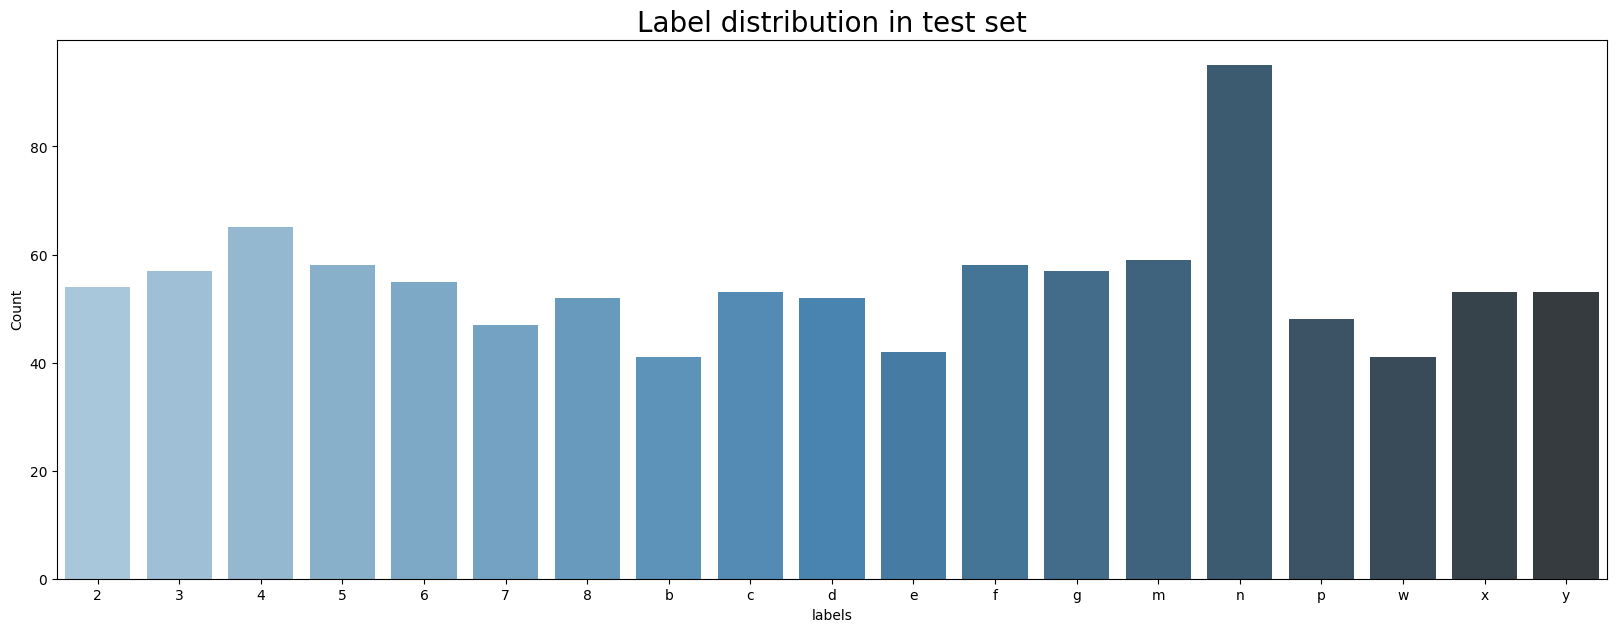

In [ ]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

# Oversampling

In [ ]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8170, 800)
(8170, 19)


In [ ]:
X_train = np.reshape(X_train, (8170, 40, 20, 1))

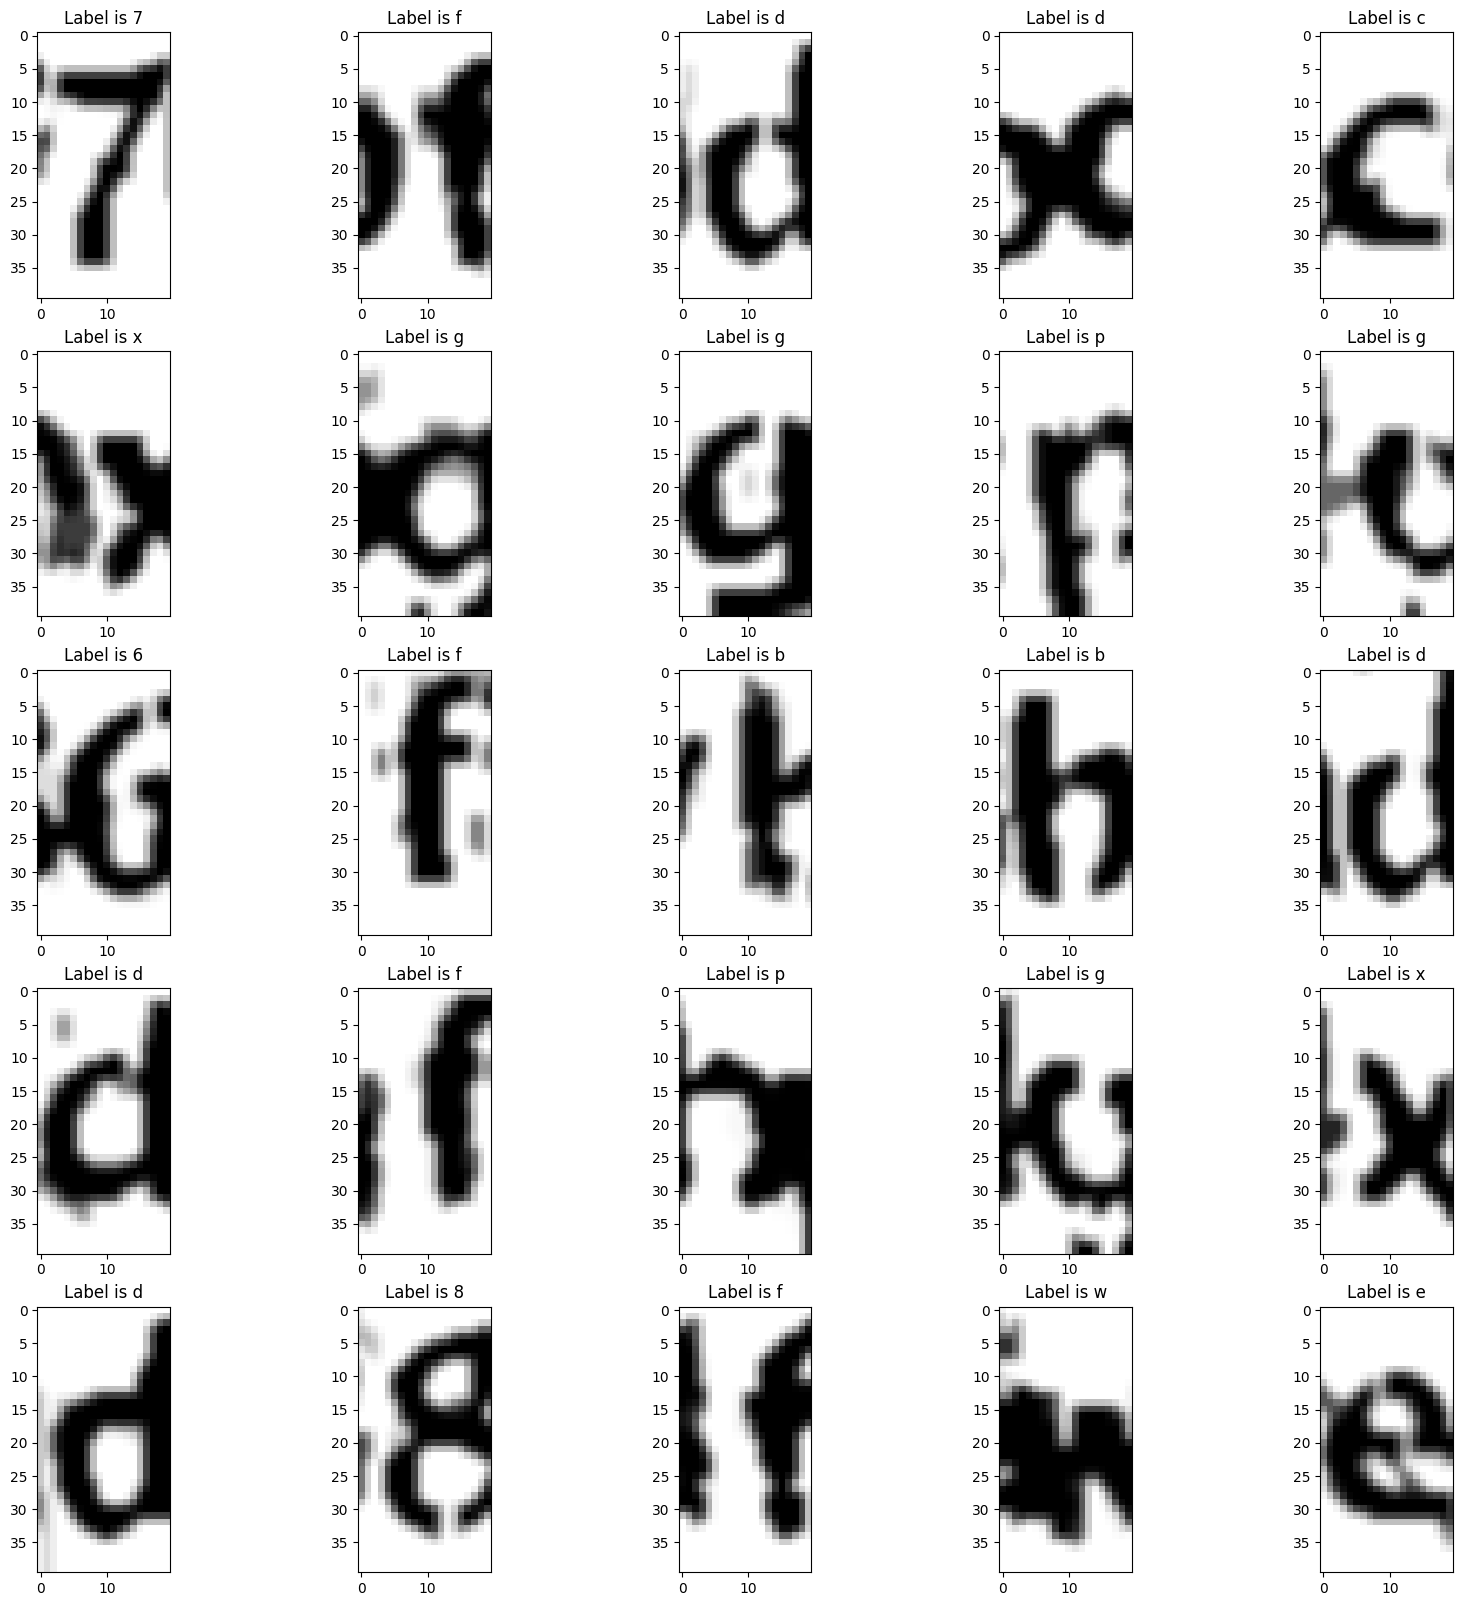

In [ ]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()


In [ ]:
# traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
# traingen.fit(X_train)

In [ ]:
# train_set = traingen.flow(X_train, y_train)

In [ ]:
# trainX, trainy = train_set.next()

In [ ]:
# plt.figure(figsize = (20,20))

# hi = 32
# lo = 0

# for i in range(25) :
#     plt.subplot(5,5,i+1)
#     x = np.random.randint(lo, hi)
#     plt.imshow(trainX[x], 'gray')
#     plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
# plt.show()


# Model 1 : CNN

## Model Creation


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input
from tensorflow.keras.utils import plot_model

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8170, 40, 20, 1)
(8170, 19)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [ ]:
def conv_layer(filterx):
    model = Sequential()
    model.add(Conv2D(filterx, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    return model

In [ ]:
def dens_layer(hiddenx):
    model = Sequential()
    model.add(Dense(hiddenx, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    return model

In [ ]:
def cnn(filter1, filter2, filter3, hidden1, hidden2):
    model = Sequential()
    model.add(Input(shape=(40, 20, 1)))
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    model.add(Dense(19, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Model Training

In [ ]:
# model = cnn(128, 32, 16, 32, 32)
model = cnn(32, 64, 128, 256, 128)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 20, 10, 32)        448       
                                                                 
 sequential_2 (Sequential)   (None, 10, 5, 64)         18752     
                                                                 
 sequential_3 (Sequential)   (None, 5, 3, 128)         74368     
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 sequential_4 (Sequential)   (None, 256)               492800    
                                                                 
 sequential_5 (Sequential)   (None, 128)               33408     
                                                                 
 dense_2 (Dense)             (None, 19)                2

In [ ]:
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# # Define the callbacks
# checkp = ModelCheckpoint('./result_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

In [ ]:
# reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8170, 40, 20, 1)
(8170, 19)


In [ ]:


# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# history = model.fit(traingen.flow(X_train, y_train, batch_size=32),
#                     validation_data=(X_test, y_test),
#                     epochs=150,
#                     steps_per_epoch=int(len(X_train)/32),
#                     callbacks=[checkp, reduce, early_stop])

model.save('./result_model_final.h5')

Epoch 1/10
256/256 [==============================] - 28s 95ms/step - loss: 0.8652 - accuracy: 0.7610 - val_loss: 8.7787 - val_accuracy: 0.0558
Epoch 2/10
256/256 [==============================] - 28s 110ms/step - loss: 0.3764 - accuracy: 0.8918 - val_loss: 2.3705 - val_accuracy: 0.4673
Epoch 3/10
256/256 [==============================] - 24s 93ms/step - loss: 0.3007 - accuracy: 0.9097 - val_loss: 0.6619 - val_accuracy: 0.8058
Epoch 4/10
256/256 [==============================] - 23s 90ms/step - loss: 0.2525 - accuracy: 0.9240 - val_loss: 0.7034 - val_accuracy: 0.8038
Epoch 5/10
256/256 [==============================] - 24s 92ms/step - loss: 0.2090 - accuracy: 0.9333 - val_loss: 0.5507 - val_accuracy: 0.8683
Epoch 6/10
256/256 [==============================] - 23s 91ms/step - loss: 0.1932 - accuracy: 0.9376 - val_loss: 0.7225 - val_accuracy: 0.8260
Epoch 7/10
256/256 [==============================] - 25s 99ms/step - loss: 0.1688 - accuracy: 0.9475 - val_loss: 0.5467 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# ini kalo cara epoch pake traingen.flow
# checkp = ModelCheckpoint('./result_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
# reduce = ReduceLROnPlateau(monitor='val_loss', patience=20, verbose=1)
# early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

# # Create and train the model with data generator and callbacks
# model = cnn(32, 64, 128, 256, 128)
# history = model.fit(traingen.flow(X_train, y_train, batch_size=32),
#                     validation_data=(X_test, y_test),
#                     epochs=150,
#                     steps_per_epoch=int(len(X_train)/32),
#                     callbacks=[checkp, reduce, early_stop])

# # Save the final model
# model.save('./result_model_final.h5')

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

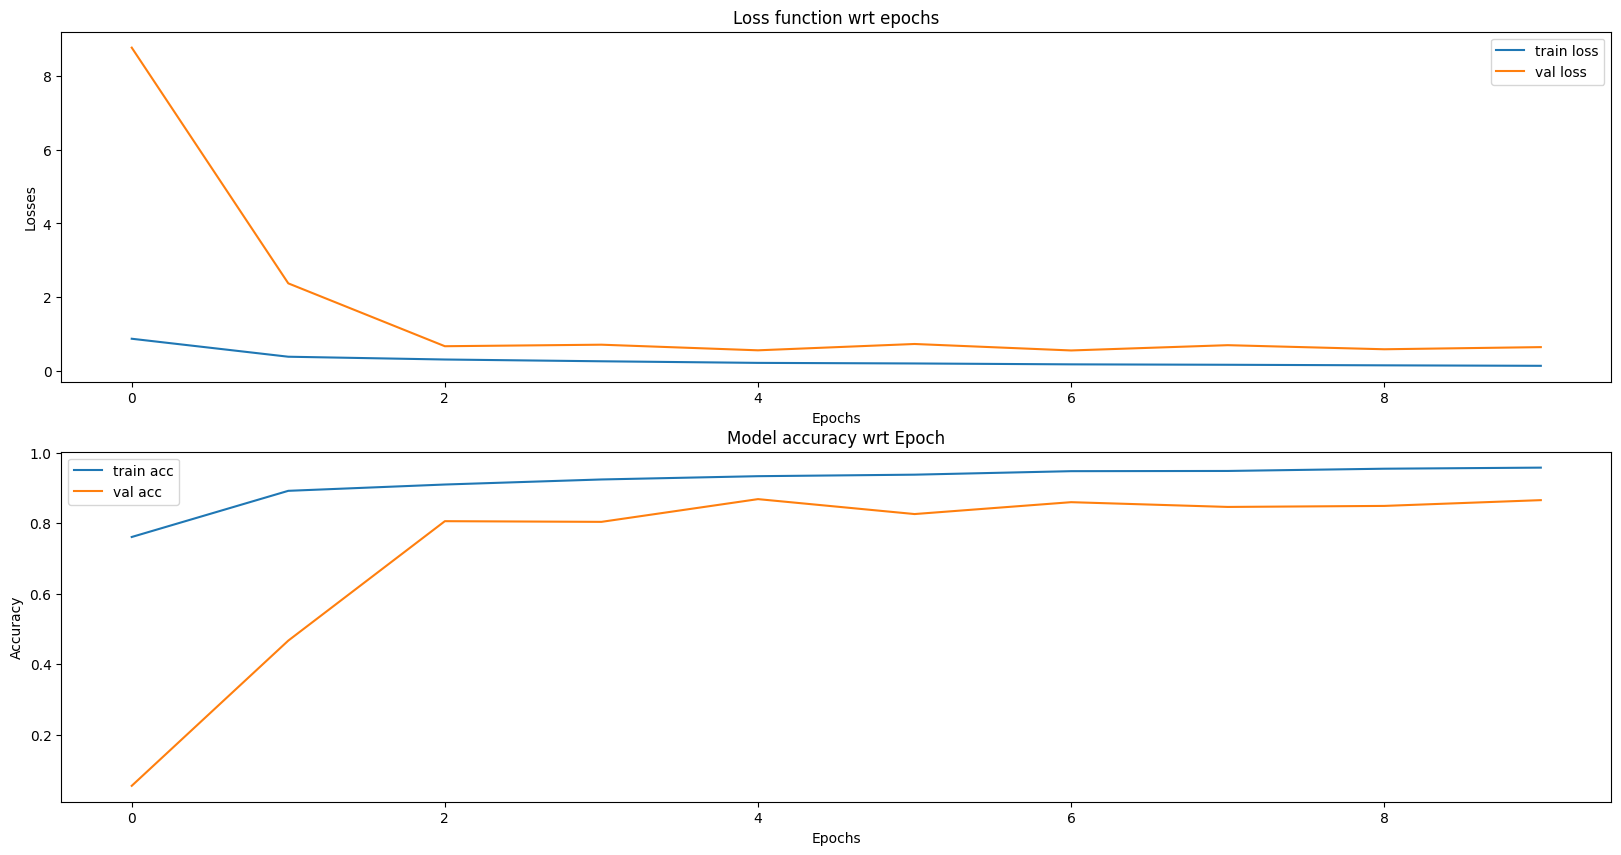

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

## Prediction

In [ ]:
from keras.models import load_model

# Load the model
model = load_model('./result_model_final.h5')

pred = model.predict(X_test)


33/33 [==============================] - 1s 24ms/step


In [ ]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

target_name = []
for i in sorted(info) :
    target_name.append(info[i])

target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [ ]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name,digits=4))

Accuracy : 0.8653846153846154
              precision    recall  f1-score   support

           2     0.9259    0.9259    0.9259        54
           3     0.8571    0.9474    0.9000        57
           4     0.9524    0.9231    0.9375        65
           5     0.9474    0.9310    0.9391        58
           6     0.8525    0.9455    0.8966        55
           7     0.9535    0.8723    0.9111        47
           8     0.9091    0.9615    0.9346        52
           b     0.9302    0.9756    0.9524        41
           c     0.7231    0.8868    0.7966        53
           d     0.8600    0.8269    0.8431        52
           e     0.8684    0.7857    0.8250        42
           f     0.9123    0.8966    0.9043        58
           g     0.9796    0.8421    0.9057        57
           m     0.5753    0.7119    0.6364        59
           n     0.8621    0.5263    0.6536        95
           p     1.0000    0.8750    0.9333        48
           w     0.6897    0.9756    0.8081        

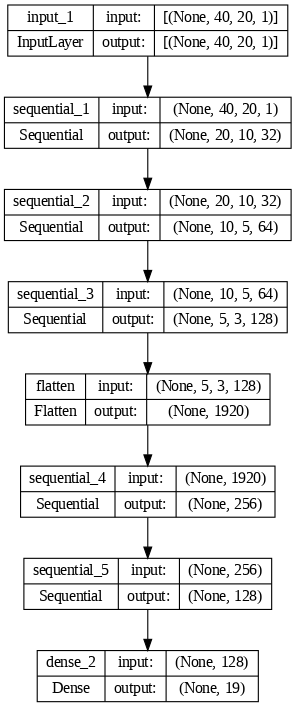

In [ ]:
plot_model(model=model, to_file="CaptchModel.png", show_layer_names=True, show_shapes=True, dpi=80)

In [ ]:
info = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
        10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i'}

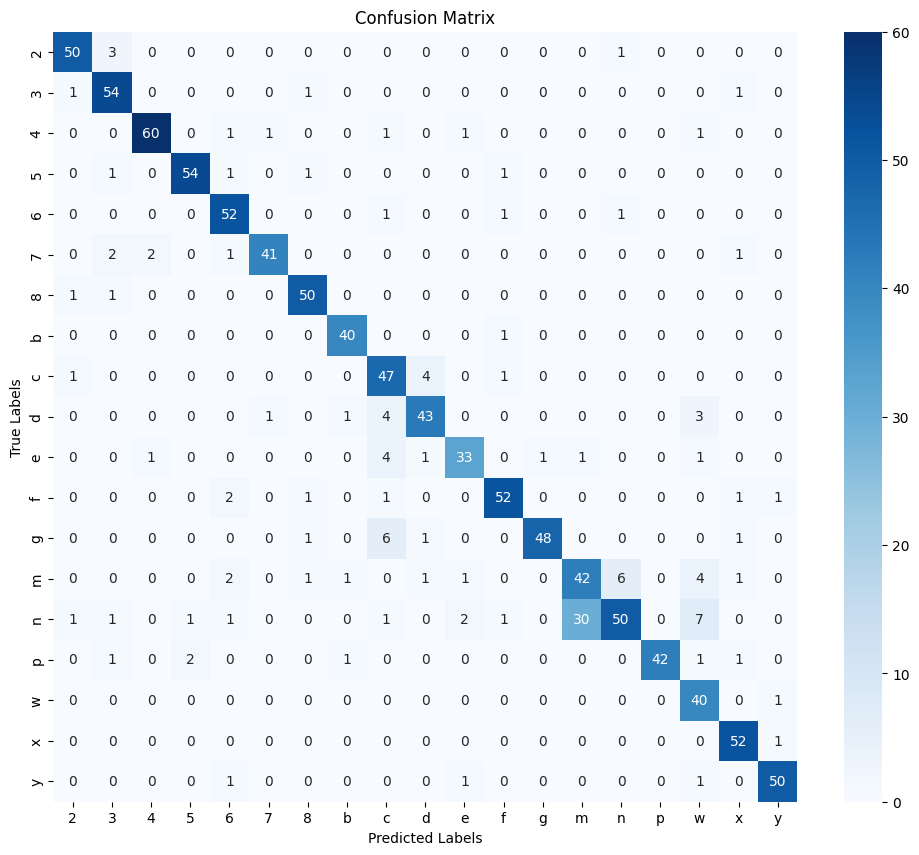

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(yres, pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Testing on samples(nyoba nyoba)

In [ ]:
def get_demo (img_path) :

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))

    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0

    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)

    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

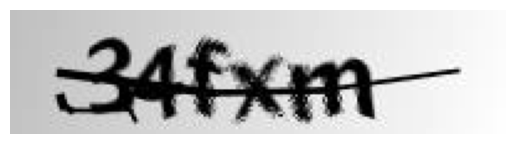

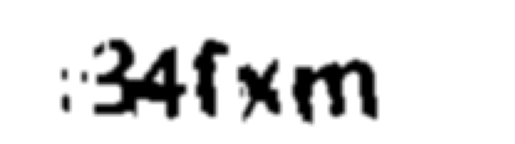

1/1 [==============================] - 0s 30ms/step
3
4
f
x
m
34fxm.png


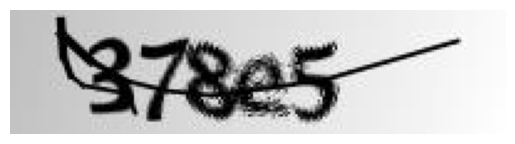

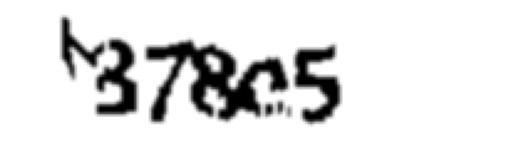

1/1 [==============================] - 0s 29ms/step
3
7
8
e
5
378e5.png


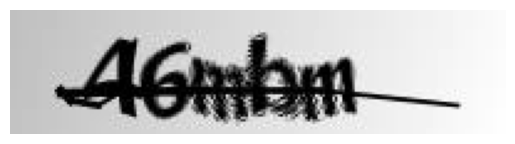

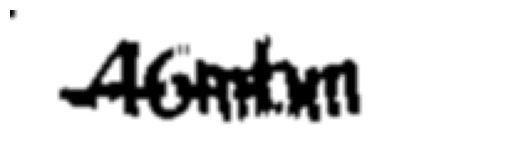

1/1 [==============================] - 0s 34ms/step
4
6
m
b
m
46mbm.png


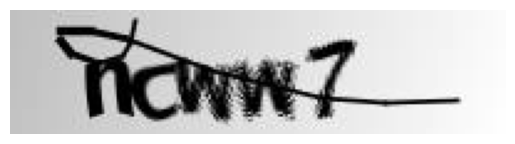

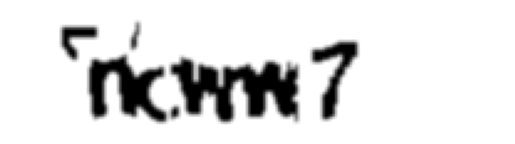

1/1 [==============================] - 0s 26ms/step
n
c
w
w
7
ncww7.png


In [ ]:
get_demo('/content/drive/MyDrive/Captcha Dataset Kaggle/34fxm.png')
get_demo('/content/drive/MyDrive/Captcha Dataset Kaggle/378e5.png')
get_demo('/content/drive/MyDrive/Captcha Dataset Kaggle/46mbm.png')
get_demo('/content/drive/MyDrive/Captcha Dataset Kaggle/ncww7.png')

#Model 2 : CNN - RNN

In [ ]:
# Common
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Data
from glob import glob
from tqdm import tqdm
from tensorflow import io
import tensorflow.data as tfd

# Data Visualization
from IPython.display import clear_output as cls
import matplotlib.pyplot as plt

# Model
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.utils import plot_model

In [ ]:
char_to_num = layers.StringLookup(
    vocabulary=target_name,
    mask_token=None
)

# Reverse mapping from numbers to characters.
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(),
    invert=True,
    mask_token=None
)

In [ ]:
class CTCLayer(layers.Layer):

    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)

        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):

        batch_size = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_len  = tf.cast(tf.shape(y_pred)[1], dtype='int64')
        label_len  = tf.cast(tf.shape(y_true)[1], dtype='int64')

        input_len *= tf.ones(shape=(batch_size, 1), dtype='int64')
        label_len *= tf.ones(shape=(batch_size, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_len, label_len)
        self.add_loss(loss)

        return y_pred

In [ ]:


input_image = layers.Input(shape=(50, 200, 1), name="image", dtype=tf.float32)

# Label input layer
input_label = layers.Input(shape=(None, ), dtype=tf.float32, name="label")

# Convolutional network part for capturing the image features.
conv_1 = layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation='relu',
    padding='same',
    kernel_initializer='he_normal',
    name="Conv1"
)(input_image)

pool_1 = layers.MaxPool2D(pool_size=(2,2), name="Pool1")(conv_1)

conv_2 = layers.Conv2D(
    filters=64,
    kernel_size=3,
    activation='relu',
    padding='same',
    kernel_initializer='he_normal',
    name="Conv2"
)(pool_1)

image_embedding = layers.MaxPool2D(pool_size=(2,2), name="Pool2")(conv_2)

# Reshaped inputs carefully for making it compatible for the recurrent neural network.
reshaped = layers.Reshape(target_shape=(50//4, (200//4)*64), name="Reshape")(image_embedding)
encoding = layers.Dense(
    64,
    activation='relu',
    kernel_initializer='he_normal',
    name="DenseMapping"
)(reshaped)
encoding = layers.Dropout(0.2, name="DenseDrop")(encoding)

# Pass these representations to a recurrent neural network
rnn_1 = layers.Bidirectional(layers.GRU(128, return_sequences=True, dropout=0.25))(encoding)
text_embedding = layers.Bidirectional(layers.GRU(64, return_sequences=True, dropout=0.25))(rnn_1)

# Output layer for model predictions
output_preds = layers.Dense(units=len(char_to_num.get_vocabulary())+1, activation='softmax', name="Output")(text_embedding)

# CTC loss layer
Output = CTCLayer(name="CTCLoss")(input_label, output_preds)

In [ ]:


# Final model
ocr_model = keras.Model(
    inputs=[input_image, input_label],
    outputs=[Output]
)

# Model summary
ocr_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 50, 200, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 50, 200, 32)          320       ['image[0][0]']               
                                                                                                  
 Pool1 (MaxPooling2D)        (None, 25, 100, 32)          0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 25, 100, 64)          18496     ['Pool1[0][0]']               
                                                                                              

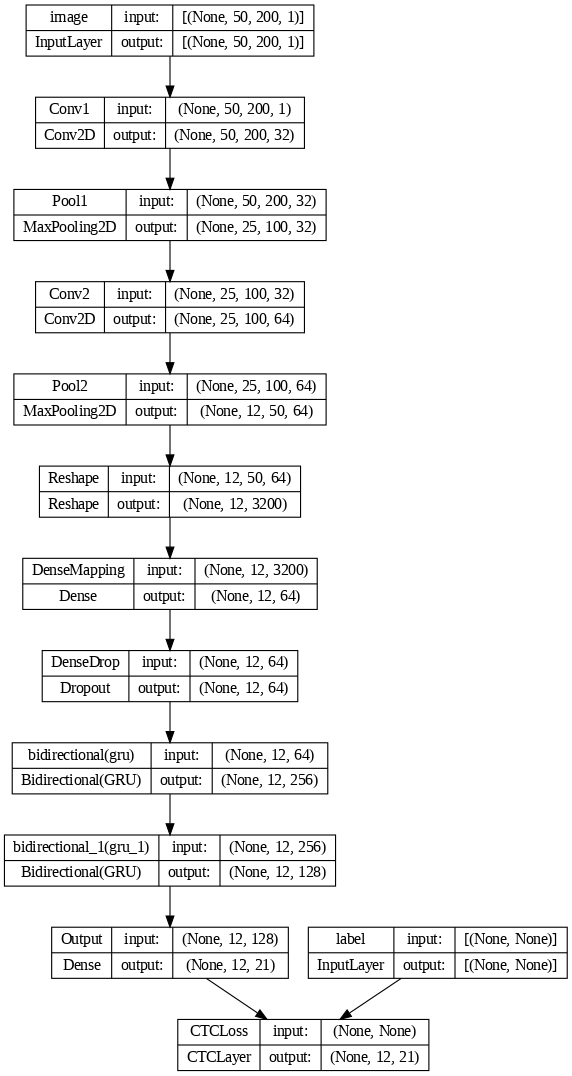

In [ ]:
plot_model(model=ocr_model, to_file="OCRCaptchModel.png", show_layer_names=True, show_shapes=True, dpi=80)

In [ ]:

import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import callbacks

# Define input shape
input_shape = (40, 20, 1)

# Define input layers
input_layer1 = Input(shape=input_shape)
input_layer2 = Input(shape=input_shape)

# Model architecture
x1 = Conv2D(32, (3, 3), activation='relu')(input_layer1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Flatten()(x1)

x2 = Conv2D(32, (3, 3), activation='relu')(input_layer2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Flatten()(x2)

merged = tf.keras.layers.concatenate([x1, x2])
output = Dense(19, activation='softmax')(merged)  # Change output shape to (None, 19)

# Create model
ocr_model = Model(inputs=[input_layer1, input_layer2], outputs=output)

# Compile the model
ocr_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
ocr_model_history = ocr_model.fit(
    [X_train, X_train], y_train,
    validation_data=([X_test, X_test], y_test),
    epochs=10,
    callbacks=[
        callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        callbacks.ModelCheckpoint("OCRCaptchModel.h5", save_best_only=True),
    ]
)

Epoch 1/10
256/256 [==============================] - 9s 31ms/step - loss: 1.1188 - accuracy: 0.7108 - val_loss: 0.8876 - val_accuracy: 0.7760
Epoch 2/10
256/256 [==============================] - 6s 22ms/step - loss: 0.5164 - accuracy: 0.8661 - val_loss: 0.7661 - val_accuracy: 0.8067
Epoch 3/10
256/256 [==============================] - 8s 30ms/step - loss: 0.3726 - accuracy: 0.9001 - val_loss: 0.7668 - val_accuracy: 0.8010
Epoch 4/10
256/256 [==============================] - 6s 22ms/step - loss: 0.2859 - accuracy: 0.9244 - val_loss: 0.7397 - val_accuracy: 0.8327
Epoch 5/10
256/256 [==============================] - 8s 30ms/step - loss: 0.2307 - accuracy: 0.9389 - val_loss: 0.7364 - val_accuracy: 0.8298
Epoch 6/10
256/256 [==============================] - 6s 23ms/step - loss: 0.1939 - accuracy: 0.9453 - val_loss: 0.7484 - val_accuracy: 0.8260
Epoch 7/10
256/256 [==============================] - 6s 25ms/step - loss: 0.1657 - accuracy: 0.9520 - val_loss: 0.8054 - val_accuracy: 0.8192

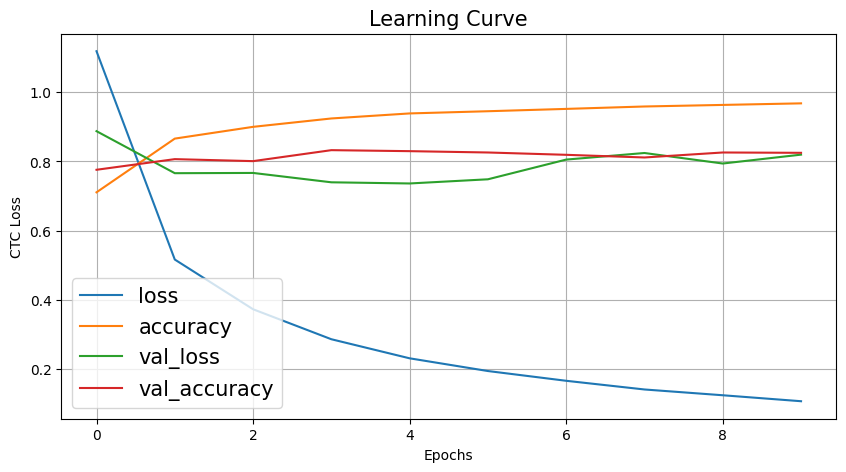

In [ ]:
pd.DataFrame(ocr_model_history.history).plot(figsize=(10,5))
plt.title("Learning Curve", fontsize=15)
plt.xlabel("Epochs")
plt.ylabel('CTC Loss')
plt.legend(fontsize=15)
plt.grid()
plt.show()

In [ ]:
# Print the training and validation accuracy
print("Training Accuracy:", ocr_model_history.history['accuracy'])
print("Validation Accuracy:", ocr_model_history.history['val_accuracy'])

# Print the last training and validation accuracy
print("Training Accuracy:", ocr_model_history.history['accuracy'][-1])
print("Validation Accuracy:", ocr_model_history.history['val_accuracy'][-1])




Training Accuracy: [0.7107711434364319, 0.8660954833030701, 0.9001224040985107, 0.9243574142456055, 0.9389228820800781, 0.9452876448631287, 0.9520195722579956, 0.9589963555335999, 0.963525116443634, 0.9680538773536682]
Validation Accuracy: [0.7759615182876587, 0.8067307472229004, 0.8009615540504456, 0.8326923251152039, 0.829807698726654, 0.8259615302085876, 0.8192307949066162, 0.8115384578704834, 0.8259615302085876, 0.824999988079071]
Training Accuracy: 0.9680538773536682
Validation Accuracy: 0.824999988079071


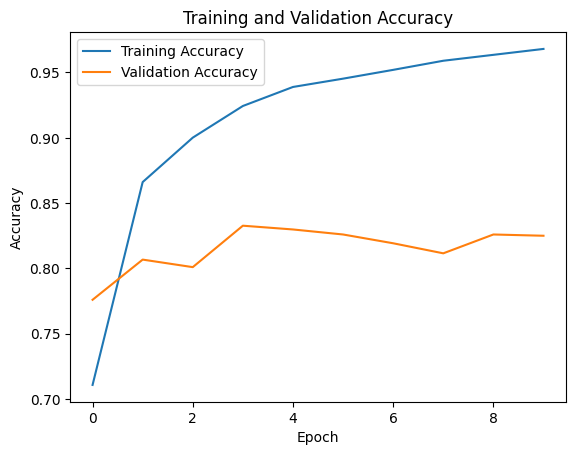

In [ ]:
# Plot training and validation accuracy
plt.plot(ocr_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(ocr_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Lakukan prediksi pada set data pengujian
y_pred = ocr_model.predict([X_test, X_test])

# Konversikan prediksi ke label yang diinginkan
# Asumsikan bahwa y_test adalah label dalam bentuk satu-hot
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Cetak laporan klasifikasi
print(classification_report(y_true_classes, y_pred_classes, digits = 4))


33/33 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0     0.8727    0.8889    0.8807        54
           1     0.8793    0.8947    0.8870        57
           2     0.8788    0.8923    0.8855        65
           3     0.8621    0.8621    0.8621        58
           4     0.9184    0.8182    0.8654        55
           5     0.7647    0.8298    0.7959        47
           6     0.9412    0.9231    0.9320        52
           7     0.9500    0.9268    0.9383        41
           8     0.7414    0.8113    0.7748        53
           9     0.7647    0.7500    0.7573        52
          10     0.8667    0.6190    0.7222        42
          11     0.7826    0.9310    0.8504        58
          12     0.9608    0.8596    0.9074        57
          13     0.5254    0.5254    0.5254        59
          14     0.6429    0.6632    0.6528        95
          15     0.8800    0.9167    0.8980        48
          16     0.8372    0

#Model 3 : DenseNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.applications import DenseNet121

# Define input shape
input_shape = (40, 20, 1)

# Pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze base model layers
base_model.trainable = False

# Input layer
input_layer = layers.Input(shape=input_shape)

# Convert grayscale image to RGB
x = layers.Conv2D(3, (1, 1), padding='same')(input_layer)

# Resize input to match the input size required by DenseNet121
x = layers.Resizing(32, 32)(x)

# Base model
x = base_model(x, training=False)

# Global average pooling
x = layers.GlobalAveragePooling2D()(x)

# Dense layers
x = layers.Dense(256, activation='relu')(x)
dropout = layers.Dropout(0.5)(x)

# Output layer
output_layer = layers.Dense(19, activation='softmax')(dropout)  # Change output shape to (None, 19)

# Create model
densenet_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
densenet_model_history = densenet_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    callbacks=[
        callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        callbacks.ModelCheckpoint("DenseNet_Model.h5", save_best_only=True),
    ]
)

# Print the training and validation accuracy
print("Training Accuracy:", densenet_model_history.history['accuracy'][-1])
print("Validation Accuracy:", densenet_model_history.history['val_accuracy'][-1])




29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 1.8143 - accuracy: 0.4718

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - 119s 424ms/step - loss: 1.8143 - accuracy: 0.4718 - val_loss: 1.3164 - val_accuracy: 0.6577
Epoch 2/10
256/256 [==============================] - 100s 392ms/step - loss: 1.1493 - accuracy: 0.6611 - val_loss: 1.1323 - val_accuracy: 0.6856
Epoch 3/10
256/256 [==============================] - 105s 408ms/step - loss: 0.9661 - accuracy: 0.7218 - val_loss: 1.0390 - val_accuracy: 0.7125
Epoch 4/10
256/256 [==============================] - 98s 382ms/step - loss: 0.8610 - accuracy: 0.7483 - val_loss: 0.9762 - val_accuracy: 0.7500
Epoch 5/10
256/256 [==============================] - 106s 415ms/step - loss: 0.7855 - accuracy: 0.7707 - val_loss: 0.9695 - val_accuracy: 0.7433
Epoch 6/10
256/256 [==============================] - 102s 400ms/step - loss: 0.7394 - accuracy: 0.7803 - val_loss: 0.9439 - val_accuracy: 0.7462
Epoch 7/10
256/256 [==============================] - 104s 407ms/step - loss: 0.6819 - accuracy: 0.7973 - val_loss: 0.9289 - val_accurac

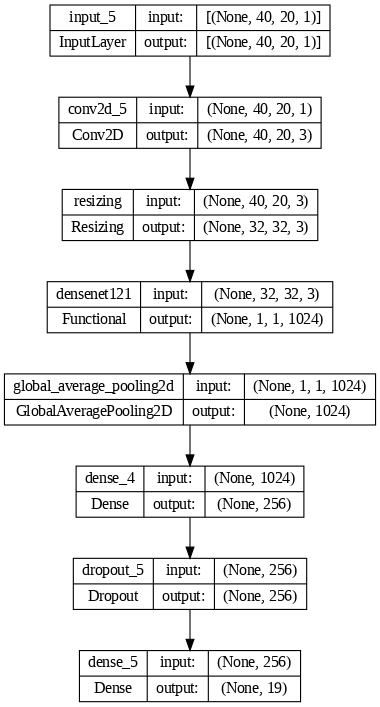

In [ ]:
plot_model(model=densenet_model, to_file="DenseNetCaptchModel.png", show_layer_names=True, show_shapes=True, dpi=80)

In [ ]:
y_pred = densenet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes, digits = 4))


33/33 [==============================] - 3s 95ms/step
              precision    recall  f1-score   support

           0     0.7333    0.8148    0.7719        54
           1     0.8980    0.7719    0.8302        57
           2     0.7179    0.8615    0.7832        65
           3     0.8684    0.5690    0.6875        58
           4     0.7679    0.7818    0.7748        55
           5     0.7872    0.7872    0.7872        47
           6     0.8491    0.8654    0.8571        52
           7     0.8182    0.8780    0.8471        41
           8     0.8810    0.6981    0.7789        53
           9     0.6140    0.6731    0.6422        52
          10     0.6512    0.6667    0.6588        42
          11     0.7903    0.8448    0.8167        58
          12     0.8889    0.7018    0.7843        57
          13     0.8889    0.2712    0.4156        59
          14     0.5625    0.7579    0.6457        95
          15     0.7586    0.9167    0.8302        48
          16     0.7255    

(8170, 40, 20, 1)
(8170, 19)
(1040, 40, 20, 1)
(1040, 19)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40, 20, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 20, 32)        320       
                                                                 
 batch_normalization_10 (Ba  (None, 40, 20, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 40, 20, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 20, 10, 32)        0         
 g2D)                                                            
                                                                 
 co

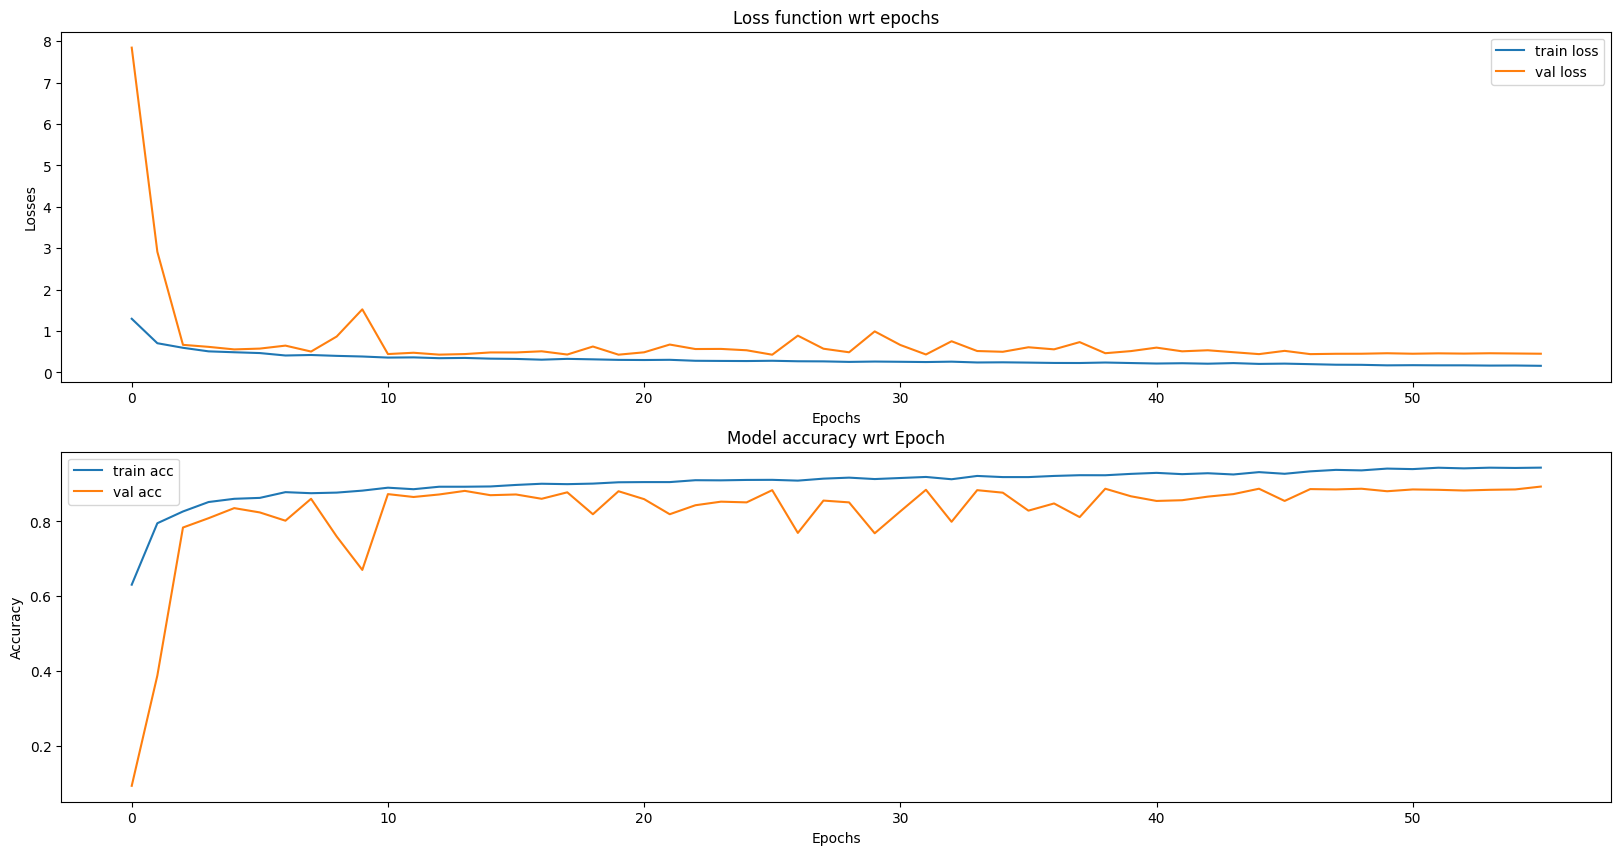

33/33 [==============================] - 1s 27ms/step
Accuracy : 0.8836538461538461
              precision    recall  f1-score   support

           0     0.9286    0.9630    0.9455        54
           1     1.0000    0.9298    0.9636        57
           2     0.9375    0.9231    0.9302        65
           3     1.0000    0.9138    0.9550        58
           4     0.9259    0.9091    0.9174        55
           5     0.8431    0.9149    0.8776        47
           6     0.9800    0.9423    0.9608        52
           7     0.9318    1.0000    0.9647        41
           8     0.7288    0.8113    0.7679        53
           9     0.7778    0.8077    0.7925        52
           a     0.9143    0.7619    0.8312        42
           b     0.9322    0.9483    0.9402        58
           c     0.9630    0.9123    0.9369        57
           d     0.8000    0.4068    0.5393        59
           e     0.6720    0.8842    0.7636        95
           f     1.0000    0.9167    0.9565        

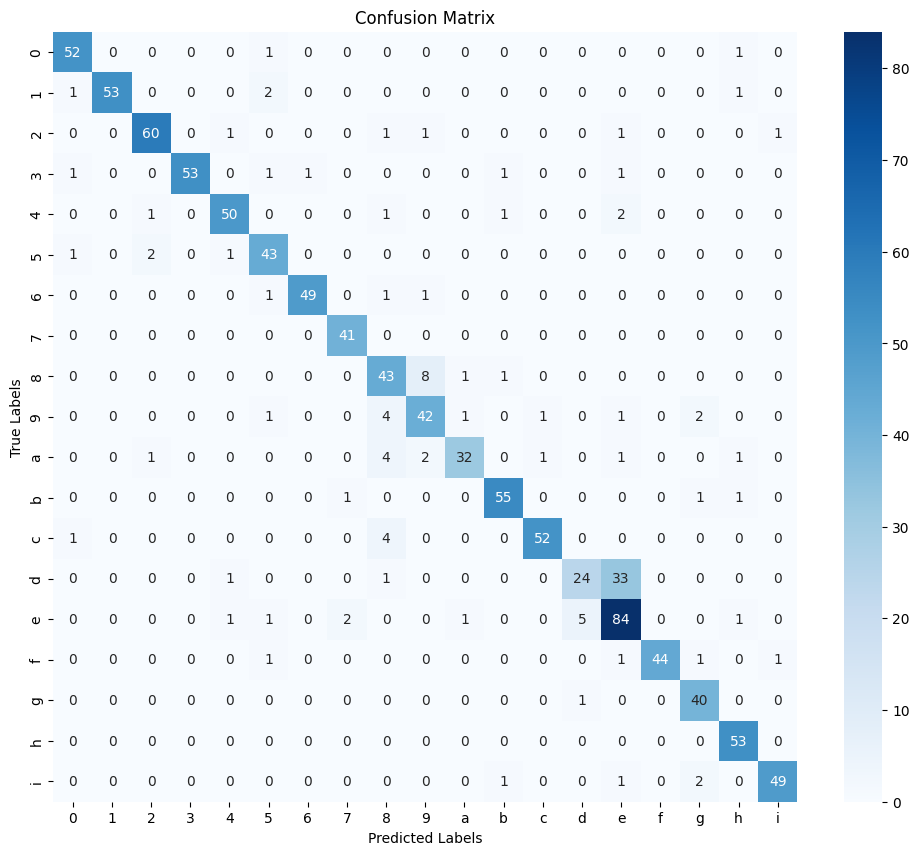

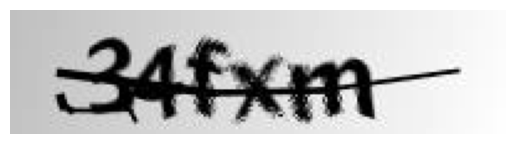

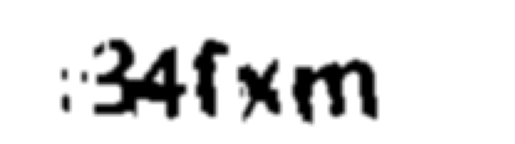

1/1 [==============================] - 0s 41ms/step
1
2
b
h
e
34fxm.png


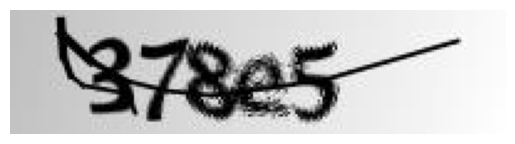

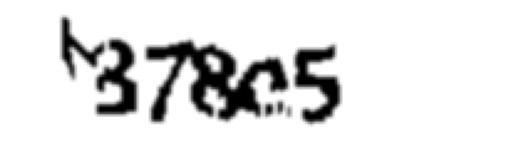

1/1 [==============================] - 0s 44ms/step
1
5
6
a
3
378e5.png


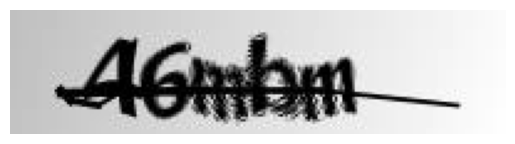

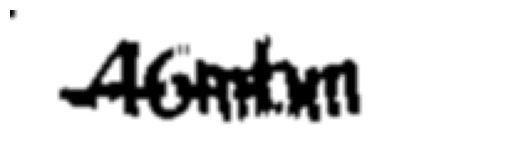

1/1 [==============================] - 0s 48ms/step
2
4
d
7
d
46mbm.png


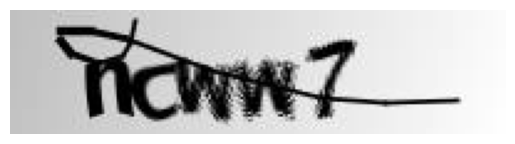

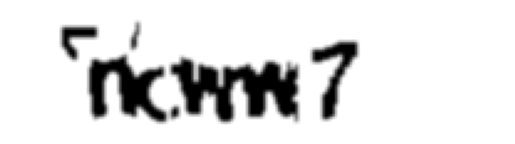

1/1 [==============================] - 0s 28ms/step
e
g
g
g
5
ncww7.png


In [ ]:
# Imports
from keras.models import Model, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define constants
input_shape = (40, 20, 1)
num_classes = 19

# Print shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Define the model layers
def conv_layer(input_tensor, filters):
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
    return x

def dens_layer(input_tensor, units):
    x = Dense(units, activation='relu')(input_tensor)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    return x

def cnn(filter1, filter2, filter3, hidden1, hidden2):
    inputs = Input(shape=input_shape)
    x = conv_layer(inputs, filter1)
    x = conv_layer(x, filter2)
    x = conv_layer(x, filter3)
    x = Flatten()(x)
    x = dens_layer(x, hidden1)
    x = dens_layer(x, hidden2)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Model creation
model = cnn(32, 64, 128, 256, 128)
model.summary()

# Callbacks
checkp = ModelCheckpoint('./result_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=20, verbose=1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Fit the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=150,
                    steps_per_epoch=int(len(X_train) / 32),
                    callbacks=[checkp, reduce, early_stop])

# Save the final model
model.save('./result_model_final.h5')

# Plot the training history
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss', 'val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc', 'val acc'])
plt.title('Model accuracy wrt Epoch')

plt.show()

# Ensure the same input shape when loading the model
model = load_model('./result_model_final.h5', compile=False)

# Prediction
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
yres = np.argmax(y_test, axis=1)

# Classification report and accuracy
info = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
        10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i'}
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names=sorted(info.values()), digits=4))

# Plot the model
plot_model(model=model, to_file="CaptchModel.png", show_layer_names=True, show_shapes=True, dpi=80)

# Confusion Matrix
conf_matrix = confusion_matrix(yres, pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(info.values()), yticklabels=sorted(info.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Testing on samples
def get_demo(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = [img_to_array(Image.fromarray(image)) for image in image_list]
    Xdemo = np.array(Xdemo) / 255.0

    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis=1)

    for res in ydemo:
        print(info[res])
    print(img_path[-9:])

get_demo('/content/drive/MyDrive/Captcha Dataset Kaggle/34fxm.png')
get_demo('/content/drive/MyDrive/Captcha Dataset Kaggle/378e5.png')
get_demo('/content/drive/MyDrive/Captcha Dataset Kaggle/46mbm.png')
get_demo('/content/drive/MyDrive/Captcha Dataset Kaggle/ncww7.png')
